<a href="https://colab.research.google.com/github/andrewpkitchin/notes_on_neural_networks/blob/main/sigmoid_fuction_and_the_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dependencies

import numpy as np, matplotlib.pyplot as plt, csv

## sigmoid function

In [2]:
# sigmoid function
# https://en.wikipedia.org/wiki/Sigmoid_function

def sigmoid(x):
 return 1/(1+np.exp(-x))

# the main reason why we use sigmoid function is because its range is between 0 and 1 
# therefore it can be used in models where we want to predict a probability as an output

Text(0.5, 1.0, 'sigmoid function')

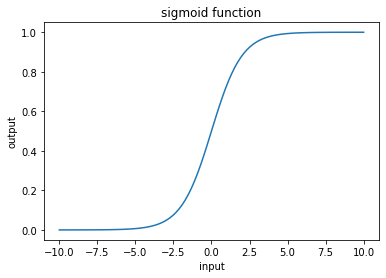

In [3]:
# visualizing the sigmoid fuction

points = np.linspace(-10,10,100)
 
plt.plot(points, sigmoid(points))
plt.xlabel("input")
plt.ylabel("output")
plt.title("sigmoid function")

Text(0.5, 1.0, 'the derivative of the sigmoid function')

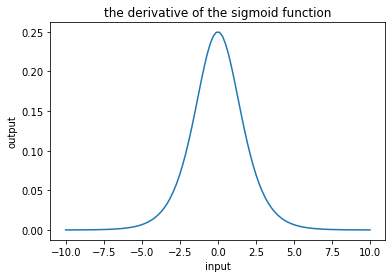

In [4]:
# the derviative of the sigmoid function

def sigmoid_der(x):
 return sigmoid(x)*(1-sigmoid(x))

# visualizing the derviative of the sigmoid function

points = np.linspace(-10,10,100)

plt.plot(points, sigmoid_der(points))
plt.xlabel("input")
plt.ylabel("output")
plt.title("the derivative of the sigmoid function")

## single neuron (perceptron)

In [5]:
# let's grab some data to play with

import requests
image_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

r = requests.get(image_url) # create HTTP response object
  
with open("data_banknote_authentication.txt",'wb') as f:
    f.write(r.content)

banknote authentication dataset

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. kurtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (0 for authentic, 1 for inauthentic)

the idea is to try to use the data from (1-4) to predict the class (5)


In [6]:
# given that the classification of the bank notes is binary, randomly guessing would give us correct answers 50% of the time
# but let's check it out anyway 

# randomly generated answers

count = 0
count_correct = 0

with open('/content/data_banknote_authentication.txt', newline='') as data:
    reader = csv.reader(data)
    for row in reader:
      count += 1
      inputs = np.array([float(row[0]), float(row[1]), float(row[2]), float(row[3])])
      #print(round(output),row[4])
      if np.random.randint(0,2) == int(row[4]):
        count_correct +=1
    print(count_correct/count)

0.5014577259475219


lets split the data set into training and testing sets

In [10]:
import pandas as pd

df = pd.read_csv('/content/data_banknote_authentication.txt',
          header=None)

In [11]:
# randomizing the order of the rows in the csv

df = df.sample(frac=1, replace=True, random_state=1)

# first 1000 rows for training  

df_training = pd.DataFrame(df[0:1000].values)

# the rest (372 rows) for testing

df_testing = pd.DataFrame(df[1000:].values) 

# writing data to csv

df_training.to_csv("banknote_training.csv",
          index=False,
          header=1,
          mode='a')

df_testing.to_csv("banknote_testing.csv",
          index=False,
          header=1,
          mode='a')

let T = [t1, t2, ... , tn]

lets try a single neuron (sometimes referred to as a perceptron) with an activation function f, such that f(T) = t1+t2+...+tn 

**rough description of parameters and processes**

inputs - [x0, x1, x2, x3]

weights - [w0, w1, w2, w3] 

logit - sum(inputs*weights) 

activation function - sum(inputs*weights)

update rule (usually called delta rule) - change in wk = xk(t-inputs*weights) for k in [0,1,2,3]

**rough plan**

randomly assign weights

run through the training set

run through the test set

In [12]:
def random_weight():
  return np.random.rand()*np.random.randint(0,2)

In [24]:
# randomly initialising weights

# weights = [w0, w1, w2, w3]

weights = []

for i in range(0,4):
    weights.append(random_weight())

weights = np.array(weights)

# setting learning rate - it's good to try different learning rates 

learning_rate = 0.001 

# training

with open('/content/banknote_training.csv', newline='') as data:
    reader = csv.reader(data)
    for row in reader:
        
        inputs = np.array([float(row[0]), float(row[1]), float(row[2]), float(row[3])])

        output = sum(inputs*weights)

        # updating the weights

        for i in range(0,4):
          weights[i] = learning_rate*float(row[i])*(output-float(row[4]))

In [25]:
# testing

count = 0
count_correct = 0

with open('/content/banknote_testing.csv', newline='') as data:
    reader = csv.reader(data)
    for row in reader:
      count += 1
      inputs = np.array([float(row[0]), float(row[1]), float(row[2]), float(row[3])])
      output = sum(inputs*weights)
      #print(round(output),row[4])
      if round(output) == int(float(row[4])):
        count_correct +=1
    print("weights", weights)
    print(count_correct/count)

weights [ 0.00467661  0.00566373 -0.01096925  0.0003345 ]
0.514745308310992


lets try using the sigmoid function as the activation function


In [28]:
# randomly initialising weights

# weights = [w0, w1, w2, w3]

weights = []

for i in range(0,4):
    weights.append(random_weight())

weights = np.array(weights)

# setting learning rate 

learning_rate = 0.01

# training

with open('/content/banknote_training.csv', newline='') as data:
    reader = csv.reader(data)
    for row in reader:
        
        inputs = np.array([float(row[0]), float(row[1]), float(row[2]), float(row[3])])

        output = 1/(1+np.exp(sum(inputs*weights)))

        # updating the weights

        for i in range(0,4):
          weights[i] = learning_rate*float(row[i])*output*(1-output)*(output-float(row[4]))

In [29]:
# testing

count = 0
count_correct = 0

with open('/content/banknote_testing.csv', newline='') as data:
    reader = csv.reader(data)
    for row in reader:
      count += 1
      inputs = np.array([float(row[0]), float(row[1]), float(row[2]), float(row[3])])
      output = 1/(1+np.exp(sum(inputs*weights)))
      #print(round(output),row[4])
      if round(output) == int(float(row[4])):
        count_correct +=1
    print("weights", weights)
    print(count_correct/count)    

weights [ 0.00553903  0.00670819 -0.01299212  0.00039618]
0.6353887399463807
